In [1]:
%load_ext autoreload
%autoreload 2
%aimport - pulp
%aimport - pulp.pulp
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from enum import StrEnum
import osmnx as ox
import networkx as nx
import pulp
from ai_planner.agentic_ai_planner_2 import AgenticPlannerWithPrediction
from index_demand_forecast.demand_forecast import (
    forecast_demand_per_district_in_saarland as run_demand_forecast,
    df_hospital_inpatients,
    df_saarland_diseases_history,
    CUT_OFF_YEAR, YEAR, REGION_CODE, VALUE
)
from index_demand_forecast.demand_forecast import forecast_demand_per_district_in_saarland as run_demand_forecast
from index_elderly_share.elderly_share import run as run_elderly_share
from index_gisd.gisd import run as run_gisd
from index_hospital_capacity.hospital_capacity_index_dict import calculate_hospital_capacity_index as run_hospital_capacity_index
from index_travel_accessibility.TAI import RUN as run_travel_time_index
from index_travel_accessibility.travel_time_and_centroid import (
    get_centroids, get_hospital_df, get_travel_time_matrix
)
from main import (
    assemble_indexes, 
    equity_index,
    centroid,
    current_hospital_demand,
    Index,
    INDEX_FUNC_MAP,
    main,
    map_predicted_and_existing_hospitals
)



In [78]:
G = ox.graph_from_place("Saarland, Germany", network_type='drive')


In [79]:
ox.save_graphml(G, "saarland_graph.graphml")

In [2]:
index_df = assemble_indexes()
weight = {
    Index.FORECAST_DEMAND: 0.25,
    Index.ELDERLY_SHARE: 0.25,
    Index.GISD: 0.25,
    Index.HOSPITAL_CAPACITY: 0.25,
    Index.TRAVEL_TIME: 0.25,
    Index.ACCESSIBILITY: 0.25,
}
equity_df = equity_index(index_df, weight)

/home/mws/miniconda3/envs/data_science/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/miniconda3/envs/data_science/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/miniconda3/envs/data_science/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/miniconda3/envs/data_science/lib/python3.13/site-packages/stats

ARIMA(3,0,0) AIC=-135.65
Current best order (3,0,0)
ARIMA(1,1,0) AIC=429.95
Current best order (1,1,0)
ARIMA(1,1,0) AIC=432.49
Current best order (1,1,0)
ARIMA(1,1,0) AIC=452.99
Current best order (1,1,0)
ARIMA(1,1,0) AIC=439.17
Current best order (1,1,0)
ARIMA(1,1,0) AIC=419.81
Current best order (1,1,0)
ARIMA(1,1,0) AIC=467.72
Current best order (1,1,0)


/home/mws/miniconda3/envs/data_science/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/miniconda3/envs/data_science/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/miniconda3/envs/data_science/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/miniconda3/envs/data_science/lib/python3.13/site-packages/stats

[GISD] Wrote 6 Saarland districts to /home/mws/uni/Data Science/equity-aware-geospatial-ai-project/src/index_gisd/data/processed/gisd_norm_saarland.csv


/home/mws/miniconda3/envs/data_science/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/mws/miniconda3/envs/data_science/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


********************************************************************************
Estimated time to run the pipeline ---->  2-3 mins
********************************************************************************
✅ Saved Saarland Hospital Dataset
********************************************************************************
✅ Saved Hospital Coordinates Dataset
********************************************************************************
✅ Saved 5 evenly spread sample points per district
********************************************************************************
✅ Found nearest hospitals to all sample points.
********************************************************************************
✅ Generated Travel times from sample points to the nearest hospitals
********************************************************************************
✅ Calculated MEAN, MEDIAN and 95th PERCENTILE of the Travel time for EACH district
************************************************************

In [3]:
import pandas as pd
# Load the Excel file
file_path = "/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/src/index_travel_accessibility/data/processed/saarland_districts_sample_points.xlsx"
df_sample_points = pd.read_excel(file_path)
SAARLAND_DISTRICT_MAPPING = {
    "Saarlouis": 10044,
    "St. Wendel": 10046,
    "Saarpfalz-Kreis": 10045,
    "Merzig-Wadern": 10042,
    "Neunkirchen": 10043,
    "Regionalverband Saarbrücken": 10041 
}
# Display basic information about the dataframe
df_sample_points = df_sample_points.replace(SAARLAND_DISTRICT_MAPPING)
df_sample_points = df_sample_points.set_index('district')

/tmp/ipykernel_52303/2489910283.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sample_points = df_sample_points.replace(SAARLAND_DISTRICT_MAPPING)


In [4]:
#STEP1: Load and Prepare District Data (Centroids)
curr_hospital_demand = current_hospital_demand()
idx = curr_hospital_demand.index

# Create the districts dataframe without MultiIndex
districts_df = pd.DataFrame({
    "demand": curr_hospital_demand.reindex(idx),
    "equity_index": equity_df.reindex(idx),
    "centroid": centroid().reindex(idx)
})
districts_df.index = districts_df.index.astype(int)
districts_df = df_sample_points.join(districts_df[['demand', 'equity_index']], how='left')
districts_df["centroid"] = districts_df.apply(
    lambda row: Point(row["longitude"], row["latitude"]),
    axis=1
)
# Create GeoDataFrame properly
districts_gdf = gpd.GeoDataFrame(districts_df, geometry="centroid", crs='EPSG:4326')

# Get hospital data and convert to GeoDataFrame
hospital_df = get_hospital_df()

# Convert to GeoDataFrame using latitude and longitude columns
hospital_gdf = gpd.GeoDataFrame(
    hospital_df, 
    geometry=gpd.points_from_xy(hospital_df.Lon, hospital_df.Lat),
    crs='EPSG:4326'  # WGS84 coordinate system
)

/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/src/index_demand_forecast/demand_forecast.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col.iloc[0] = DISTRICT_CODE
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/src/index_demand_forecast/demand_forecast.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col.iloc[1:] = col.iloc[1:].map(lambda x: int(x.split('/')[0]))
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/src/index_travel_accessibility/travel_time_and_centroid.py:40: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use

In [5]:


#STEP2: Generate Candidate Hospital Locations Around Districts
def generate_candidates(centroid, radius_km, n, bound_poly):
    r_deg = radius_km / 111.0  # Rough conversion
    points = []
    for _ in range(n):
        r = r_deg * np.sqrt(np.random.rand())
        theta = np.random.rand() * 2 * np.pi
        dx, dy = r * np.cos(theta), r * np.sin(theta)
        
        cand = Point(centroid.x + dx, centroid.y + dy)
        
        if bound_poly.contains(cand):
            points.append(cand)
            
    return points
# conv_districts_gdf = districts_gdf.to_crs(epsg=32632)
# conv_districts_gdf['centroid'] = conv_districts_gdf.geometry.centroid
gdf_saarland = ox.geocode_to_gdf("Saarland, Germany")
gdf_saarland_utm = gdf_saarland.to_crs(epsg=4326)
poly_utm = gdf_saarland_utm.loc[0, "geometry"] 

n_samples_per_centroid = 10
candidates = []
for _, row in districts_gdf.iterrows():
    need_score = row['equity_index']
    n_samples = int((need_score) * n_samples_per_centroid)
    candidates += generate_candidates(row['centroid'], radius_km=7, n=n_samples, bound_poly=poly_utm)

candidates_gdf = gpd.GeoDataFrame(geometry=candidates, crs="EPSG:4326")
# candidates_gdf = candidates_gdf.to_crs(epsg=4326)

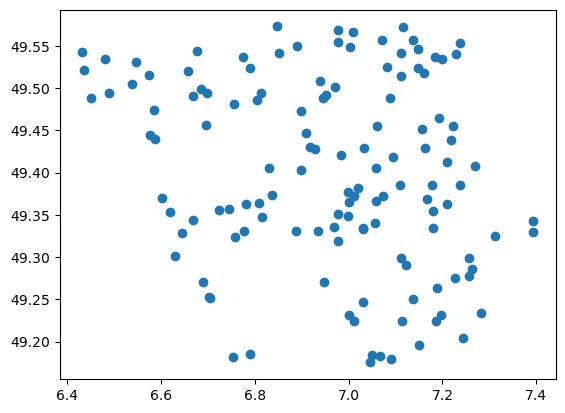

In [84]:
import matplotlib.pyplot as plt

plt.scatter(candidates_gdf.geometry.x, candidates_gdf.geometry.y)
plt.show()

In [6]:
# Use bounding box for Saarland: (north, south, east, west)
# This avoids the geometry processing issues with ox.graph_from_place
# bbox = np.array((7.0, 49.0, 7.6, 49.6))
# G = ox.graph_from_bbox(bbox, network_type='drive')
# G = ox.graph_from_place("Saarland, Germany", network_type='drive')
G = ox.load_graphml("saarland_graph.graphml")
G = ox.project_graph(G, to_crs='EPSG:4326')

# Add travel time
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

districts_gdf['node'] = ox.nearest_nodes(G, districts_gdf.geometry.x, districts_gdf.geometry.y)
districts_gdf = districts_gdf.reset_index().rename(columns={'index': 'district_code'})
# districts_gdf = districts_gdf.set_index('node')
candidates_gdf['node'] = ox.nearest_nodes(G, candidates_gdf.geometry.x, candidates_gdf.geometry.y)
# candidates_gdf = candidates_gdf.set_index('node')

#Build Travel Time Matrix
travel_times = {}  # (district_idx, candidate_idx) → travel time in minutes

#STEP4A: Build Travel Time Matrix for each candidates to each centroids
for i, d_row in districts_gdf.iterrows():
    for j, c_row in candidates_gdf.iterrows():
        try:
            t = nx.shortest_path_length(G, d_row['node'], c_row['node'], weight='length', method='dijkstra') / 60
        except:
            t = float('inf')
        travel_times[(i, j)] = t


In [7]:
hospital_gdf['node'] = ox.nearest_nodes(G, hospital_gdf.geometry.x, hospital_gdf.geometry.y)
# hospital_gdf = hospital_gdf.set_index('node')
is_existing_hospitals_neighbors = {}
DISTANCE_THRESHOLD = 7_000 # meters

#STEP4B: Build Travel Time Matrix for each candidates to each existing hospitals
for i, d_row in candidates_gdf.iterrows():
    is_existing_hospitals_neighbors[i] = []
    for j, c_row in hospital_gdf.iterrows():
        try:
            t = nx.shortest_path_length(G, d_row['node'], c_row['node'], weight='length', method='dijkstra')
        except:
            t = float('inf')
        if t <= DISTANCE_THRESHOLD:
            is_existing_hospitals_neighbors[i].append(j)


In [48]:
scores = []
for j, c_row in candidates_gdf.iterrows():
    score = 0
    for i, d_row in districts_gdf.iterrows():
        time = travel_times[(i, j)]
        if time < 30:  # Threshold: hospital within 30 minutes is valuable
            total_supply = hospital_gdf.iloc[is_existing_hospitals_neighbors[j]]['MaxBeds'].sum() + 1
            weight = d_row['demand'] / total_supply * d_row['equity_index']  # Equity-weighted demand
            score += weight / (time + 1)  # Prefer lower travel time
    scores.append((j, score))

scores_df = pd.DataFrame(scores, columns=['candidate_idx', 'score'])
top_k = scores_df.sort_values('score', ascending=False).head(10)  # Choose top K hospitals
selected_candidates = candidates_gdf.iloc[top_k['candidate_idx']]

In [32]:

# Define problem data from your existing variables
D = list(districts_gdf.index)  # districts
P = list(candidates_gdf.index)  # candidate locations

# Travel time matrix (already computed)
c = travel_times  # (district, candidate) -> travel time

# Demand, equity, and supply data
demand = dict(zip(districts_gdf.index, districts_gdf['demand']))
equity_raw = dict(zip(districts_gdf.index, districts_gdf['equity_index']))

candidates_gdf['total_supply'] =[
    hospital_gdf.iloc[is_existing_hospitals_neighbors[j]]['MaxBeds'].sum() + 1 
    for j in candidates_gdf.index
]
supply_raw = dict(zip(candidates_gdf.index, candidates_gdf['total_supply']))

Tmax = 30    # coverage threshold
k = 10        # number of new hospitals
a = {(d, p): int(c[(d, p)] <= Tmax) for d in D for p in P}

# ---- 2. NORMALIZE / ADJUST METRICS ----

# Equity norm per district (1 = most underserved)
e_min, e_max = min(equity_raw.values()), max(equity_raw.values())
equity_norm = {d: (equity_raw[d] - e_min) / (e_max - e_min) for d in D}

# Supply-need per candidate (1 = most oversupplied)
s_min, s_max = min(supply_raw.values()), max(supply_raw.values())
supply_need = {p: 1 - (supply_raw[p] - s_min) / (s_max - s_min) for p in P}

# Demand norm per district (1 = most overdemand)
d_min, d_max = min(demand.values()), max(demand.values())
demand_norm = {d: (demand[d] - d_min) / (d_max - d_min) for d in D}

# Travel time norm per district-candidate (1 = least travel time)
c_min, c_max = min(c.values()), max(c.values())
c_norm = {(d, p): (c[(d, p)] - c_min) / (c_max - c_min) for d in D for p in P}

# # Equity-adjusted demand
# demand_adj = {d: demand_norm[d] * equity_norm[d] for d in D}

# Weights for each objective
demand_weight = 0.25
equity_weight = 0.25
travel_weight = 0.25   
supply_weight = 0.25

# ---- 3. BUILD THE MODEL ----

model = pulp.LpProblem("Equity_Supply_Travel_MaxCover", pulp.LpMaximize)

# Decision vars
x = pulp.LpVariable.dicts("open", P, cat="Binary")
y = pulp.LpVariable.dicts("assign", (D, P), cat="Binary")

# Objective = (1) cover equity‐weighted demand
#           - (2) penalize opening in oversupplied spots
#           – (3) penalize long travel times
model += (
    demand_weight * pulp.lpSum(demand_norm[d] * y[d][p] for d in D for p in P)
    + equity_weight * pulp.lpSum(equity_norm[d] * y[d][p] for d in D for p in P)
    - supply_weight * pulp.lpSum(supply_need[p] * x[p] for p in P)
    - travel_weight * pulp.lpSum(c_norm[(d, p)] * y[d][p] for d in D for p in P)
), "Total_Score"

# Exactly k new hospitals
model += pulp.lpSum(x[p] for p in P) == k, "Open_k_Facilities"

# Assign only if facility open and within Tmax
for d in D:
    for p in P:
        model += y[d][p] <= x[p], f"Assign_if_open_{d}_{p}"
        model += y[d][p] <= a[(d, p)], f"Assign_within_Tmax_{d}_{p}"

model.solve(pulp.PULP_CBC_CMD(msg=False))

# ---- 4. EXTRACT & DISPLAY RESULTS ----

selected = [p for p in P if x[p].value() > 0.5]
assigns = [(d, p) for d in D for p in P if y[d][p].value() > 0.5]

print("Selected new hospital sites:", selected)
print("Assignments (within Tmax):")
for d, p in assigns:
    print(f"  District {d} ← Site {p} (tt={c[(d, p)]:.1f} min)")


Selected new hospital sites: [0, 5, 10, 12, 26, 31, 32, 58, 69, 73]
Assignments (within Tmax):
  District 0 ← Site 0 (tt=0.0 min)
  District 4 ← Site 10 (tt=29.2 min)
  District 4 ← Site 12 (tt=10.7 min)
  District 7 ← Site 26 (tt=29.6 min)
  District 8 ← Site 31 (tt=23.6 min)
  District 8 ← Site 32 (tt=0.0 min)
  District 12 ← Site 58 (tt=16.3 min)
  District 14 ← Site 69 (tt=29.3 min)
  District 15 ← Site 73 (tt=3.1 min)


In [33]:
selected_candidates = candidates_gdf.iloc[selected]

In [34]:
# Add Lat and Lon columns using assign
selected_candidates = selected_candidates.assign(
    Lat=selected_candidates.geometry.y,
    Lon=selected_candidates.geometry.x
)

In [35]:
map_predicted_and_existing_hospitals('results/predicted_hospitals_new_approach.html', selected_candidates)

✅ Map saved with existing and predicted hospitals!


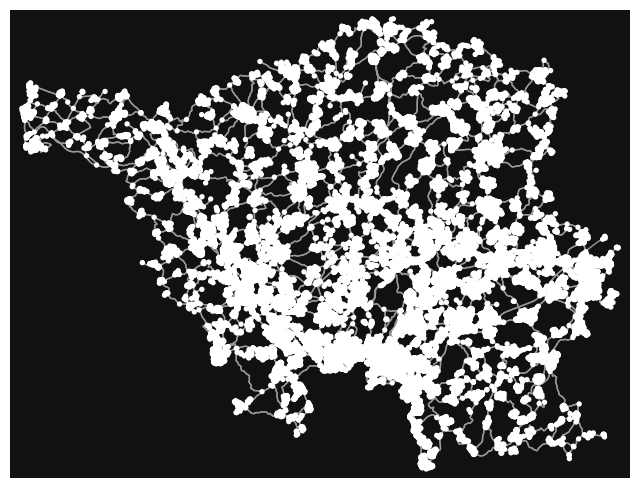

In [35]:
import matplotlib.pyplot as plt
G = ox.load_graphml("saarland_graph.graphml")
G = ox.project_graph(G, to_crs='EPSG:4326')

fig, ax = ox.plot_graph(G)
plt.show()


In [53]:
import folium
import folium.plugins
from index_travel_accessibility.travel_time_and_centroid import HOSPITAL_WITH_COORDS_DATA_PATH, NUTS_DATA_PATH
import os
def map_plot(path: str, df_predicted: pd.DataFrame, centroid_df: pd.DataFrame):
    """
    Saves map showing all existing hospitals and predicted hospitals by Agentic AI in Saarland.
    """

    # Load existing hospitals
    df_existing = pd.read_excel(HOSPITAL_WITH_COORDS_DATA_PATH)
    
    # Saarland center
    saarland_center = [49.3964, 7.0220]

    # Create map
    m = folium.Map(location=saarland_center, zoom_start=10, tiles="OpenStreetMap")

    # # Add existing hospitals (red markers)
    for _, row in df_existing.iterrows():
        if pd.notnull(row["latitude"]) and pd.notnull(row["longitude"]):
            popup = folium.Popup(f"Existing Hospital: {row['Adresse_Name']}", max_width=250)
            folium.Marker(
                location=[row["latitude"], row["longitude"]],
                popup=popup,
                icon=folium.Icon(color="red", icon="plus-sign")
            ).add_to(m)

    # Add predicted hospitals (blue markers) with numbers
    for i, (_, row) in enumerate(df_predicted.iterrows(), 1):
        if pd.notnull(row["Lat"]) and pd.notnull(row["Lon"]):
            popup = folium.Popup(f"Predicted Hospital #{i}", max_width=250)
            folium.Marker(
                location=[row["Lat"], row["Lon"]],
                popup=popup,
                icon=folium.plugins.BeautifyIcon(
                    icon="hospital",
                    border_color='blue',
                    text_color='white',
                    number=i,
                    inner_icon_style="color:blue;font-size:12px;font-weight:bold"
                )
            ).add_to(m)
    
    for _, row in centroid_df.iterrows():
        if pd.notnull(row["Lat"]) and pd.notnull(row["Lon"]):
            popup = folium.Popup(f"Centroids", max_width=250)
            folium.Marker(
                location=[row["Lat"], row["Lon"]],
                popup=popup,
                icon=folium.Icon(color="green", icon="plus-sign")
            ).add_to(m)

    # Load NUTS shapefile
    nuts_gdf = gpd.read_file(NUTS_DATA_PATH)

    # Filter Saarland districts (NUTS-3 = DECxx)
    districts = nuts_gdf[nuts_gdf["NUTS_ID"].str.startswith("DEC")]
    saarland_state = nuts_gdf[nuts_gdf["NUTS_ID"] == "DEC0"]

    # Ensure CRS is WGS84
    districts = districts.to_crs(epsg=4326)
    saarland_state = saarland_state.to_crs(epsg=4326)

    # Add Saarland state border
    folium.GeoJson(
        saarland_state,
        name="Saarland State Border",
        style_function=lambda x: {
            'fillColor': 'none',
            'color': 'red',
            'weight': 3,
            'dashArray': '5, 5'
        }
    ).add_to(m)

    # Add district borders
    folium.GeoJson(
        districts,
        name="Saarland Districts",
        style_function=lambda x: {
            'fillColor': 'none',
            'color': 'black',
            'weight': 3,
            'opacity': 0.7
        },
        tooltip=folium.GeoJsonTooltip(fields=["NUTS_NAME"])
    ).add_to(m)

    # Add custom legend using HTML
    legend_html = """
    <div style="position: fixed; 
                bottom: 40px; left: 40px; width: 200px; height: 100px; 
                background-color: white; border:2px solid grey; z-index:9999; 
                font-size:14px; padding: 10px;">
        <b>Legend</b><br>
        <i class="fa fa-map-marker fa-2x" style="color:red"></i> Existing Hospital<br>
        <i class="fa fa-map-marker fa-2x" style="color:blue"></i> Predicted Hospital<br>
        <i class="fa fa-map-marker fa-2x" style="color:green"></i> District Centroid (lettered)
    </div>
    """
    m.get_root().html.add_child(folium.Element(legend_html))

    # Add layer control
    folium.LayerControl().add_to(m)
    os.makedirs(os.path.dirname(path), exist_ok=True)
    # Save map
    m.save(path)

    print("✅ Map saved with existing and predicted hospitals!")


In [54]:
centroid_df = districts_gdf.copy()
centroid_df['Lat'] = centroid_df.geometry.y
centroid_df['Lon'] = centroid_df.geometry.x
map_plot('results/predicted_hospitals_new_approach.html', selected_candidates, centroid_df)

✅ Map saved with existing and predicted hospitals!


In [22]:
districts_gdf['weighted_demand'] = districts_gdf['demand'] * districts_gdf['equity_index']

In [31]:
districts_gdf

,district,latitude,longitude,demand,equity_index,centroid,node
0,10041,49.200724,6.782133,77764.861543,0.397881,POINT (6.78213 49.20072),1563889739
1,10041,49.289196,6.923982,77764.861543,0.397881,POINT (6.92398 49.2892),262786989
2,10041,49.244960,6.994907,77764.861543,0.397881,POINT (6.99491 49.24496),277284512
3,10041,49.156488,7.065831,77764.861543,0.397881,POINT (7.06583 49.15649),335882183
4,10041,49.289196,7.065831,77764.861543,0.397881,POINT (7.06583 49.2892),340260719
5,10042,49.492808,6.457995,27661.206303,0.665156,POINT (6.45799 49.49281),386796119
6,10042,49.492808,6.558694,27661.206303,0.665156,POINT (6.55869 49.49281),2725006849
7,10042,49.492808,6.659394,27661.206303,0.665156,POINT (6.65939 49.49281),848948935
8,10042,49.492808,6.760094,27661.206303,0.665156,POINT (6.76009 49.49281),2835269440
9,10042,49.573218,6.860794,27661.206303,0.665156,POINT (6.86079 49.57322),6294980842


In [ ]:
SAARLAND_DISTRICT_MAPPING = {
    "Saarlouis": 10044,
    "St. Wendel": 10046,
    "Saarpfalz-Kreis": 10045,
    "Merzig-Wadern": 10042,
    "Neunkirchen": 10043,
    "Regionalverband Saarbrücken": 10041 
}